In [2]:
!pip install -q gym matplotlib

import gym
import random
import numpy as np

In [3]:
# Initialize the non-slippery Frozen Lake environment
environment = gym.make('FrozenLake-v1', is_slippery=False)
environment.reset()
environment.render()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don

In [4]:
# Initialize Q-table with zeros
# Our table has the following dimensions:
# (rows x columns) = (states x actions) = (16 x 4)
# qtable = np.zeros((16, 4))

# Alternatively, the gym library can also directly
# give us the number of states and actions using
# 'env.observation_space.n' and 'env.action_space.n'
nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n    # = 4
qtable = np.zeros((nb_states, nb_actions))

# Let's see how it looks
print('Q-table =')
print(qtable)

Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
# Test
random.choice(['LEFT', 'DOWN', 'RIGHT', 'UP'])

'UP'

In [6]:
# Test
environment.action_space.sample()

3

In [7]:
# Test
environment.step(2)
environment.render()

In [8]:
# 1. Randomly choose an action using action_space.sample()
action = environment.action_space.sample()

# 2. Implement this action and move the agent in the desired direction
new_state, reward, done, info = environment.step(action)

# Display the results (map and reward)
environment.render()
print(f'Reward = {reward}')

Reward = 0.0


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.       0.       0.59049  0.      ]
 [0.       0.       0.6561   0.      ]
 [0.       0.729    0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.151875 0.      ]
 [0.       0.9      0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.225    0.      ]
 [0.       0.       1.       0.      ]
 [0.       0.       0.       0.      ]]


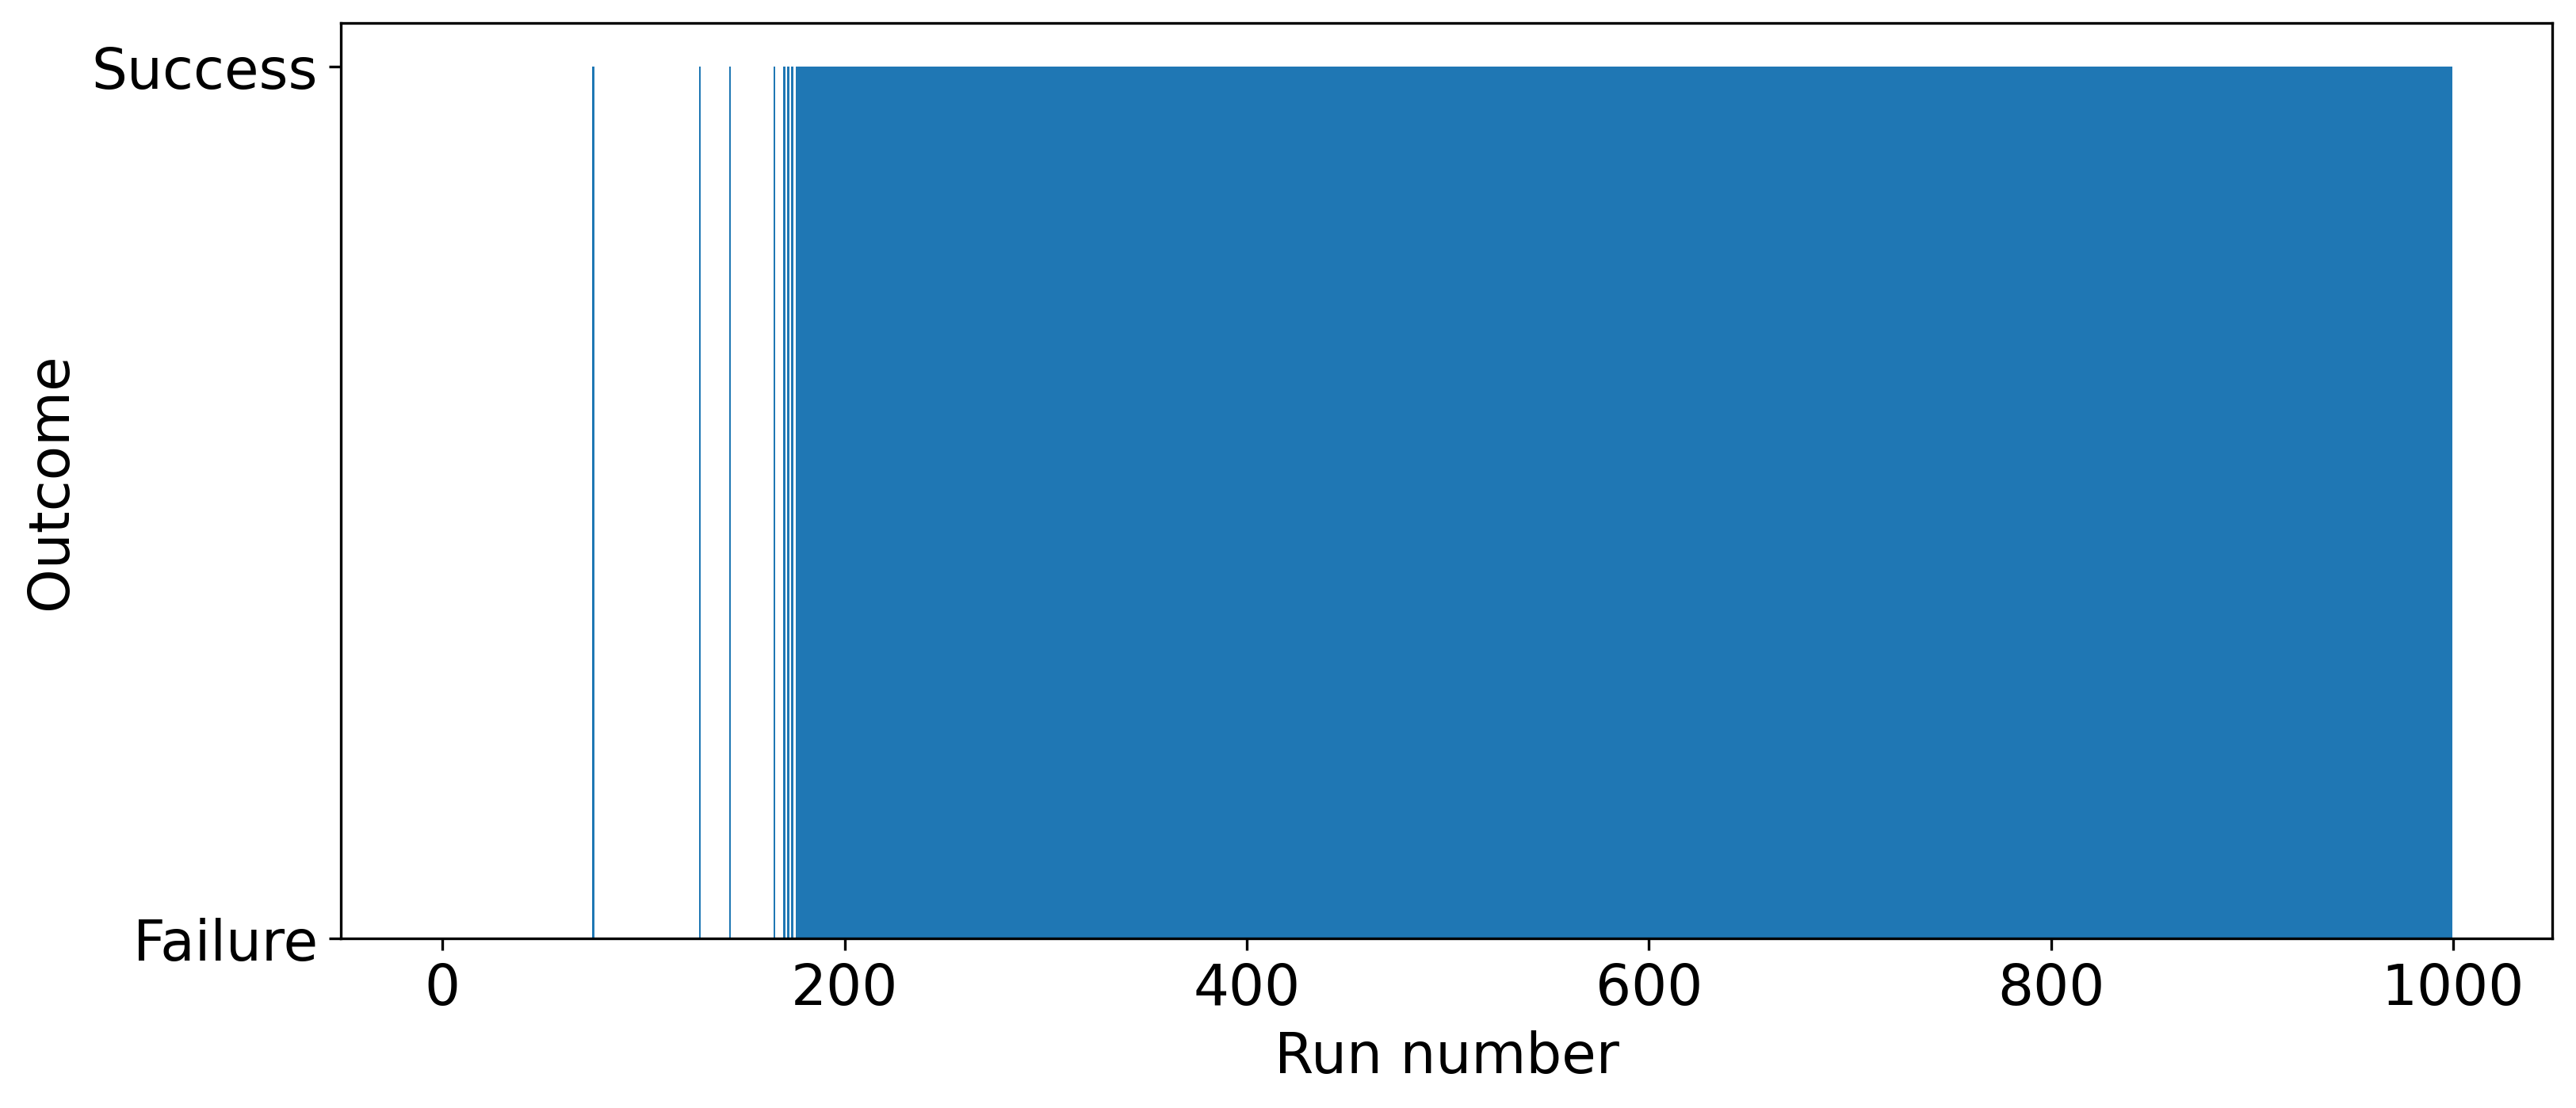

In [9]:
# Import matplotlib to plot the outcomes
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5          # Learning rate
gamma = 0.9          # Discount factor

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
  state = environment.reset()
  done = False

  # By default, we consider our outcome to be a failure
  outcomes.append('Failure')

  # Until the agent gets stuck in a hole or reaches the goal, keep training it
  while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = environment.action_space.sample()

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, info = environment.step(action)

    # Update Q(s,a)
    qtable[state, action] = qtable[state, action] + \
                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

    # Update our current state
    state = new_state

    # If we have a reward, it means that our outcome is a success
    if reward:
      outcomes[-1] = 'Success'

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel('Run number')
plt.ylabel('Outcome')
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()



In [10]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
  state = environment.reset()
  done = False

  # Until the agent gets stuck or reaches the goal, keep training it
  while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = environment.action_space.sample()

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, info = environment.step(action)

    # Update our current state
    state = new_state

    # When we get a reward, it means we solved the game
    nb_success += reward

# Let's check our success rate!
print (f'Success rate = {nb_success/episodes*100}%')

Success rate = 100.0%


In [11]:
from IPython.display import clear_output
import time

state = environment.reset()
done = False
sequence = []

while not done:
  # Choose the action with the highest value in the current state
  if np.max(qtable[state]) > 0:
    action = np.argmax(qtable[state])

  # If there's no best action (only zeros), take a random one
  else:
    action = environment.action_space.sample()

  # Add the action to the sequence
  sequence.append(action)

  # Implement this action and move the agent in the desired direction
  new_state, reward, done, info = environment.step(action)

  # Update our current state
  state = new_state

  # Update the render
  clear_output(wait=True)
  environment.render()
  time.sleep(1)

print(f'Sequence = {sequence}')

Sequence = [2, 2, 1, 1, 1, 2]


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.531441   0.         0.6561     0.59049   ]
 [0.59049    0.729      0.59049    0.6561    ]
 [0.6561     0.         0.59048229 0.59046485]
 [0.59048921 0.6561     0.         0.53144097]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.6561    ]
 [0.         0.         0.         0.        ]
 [0.65609998 0.         0.729      0.59049   ]
 [0.65609976 0.80999994 0.81       0.        ]
 [0.729      0.9        0.         0.729     ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.80451511 0.9        0.72896973]
 [0.81       0.9        1.         0.81      ]
 [0.

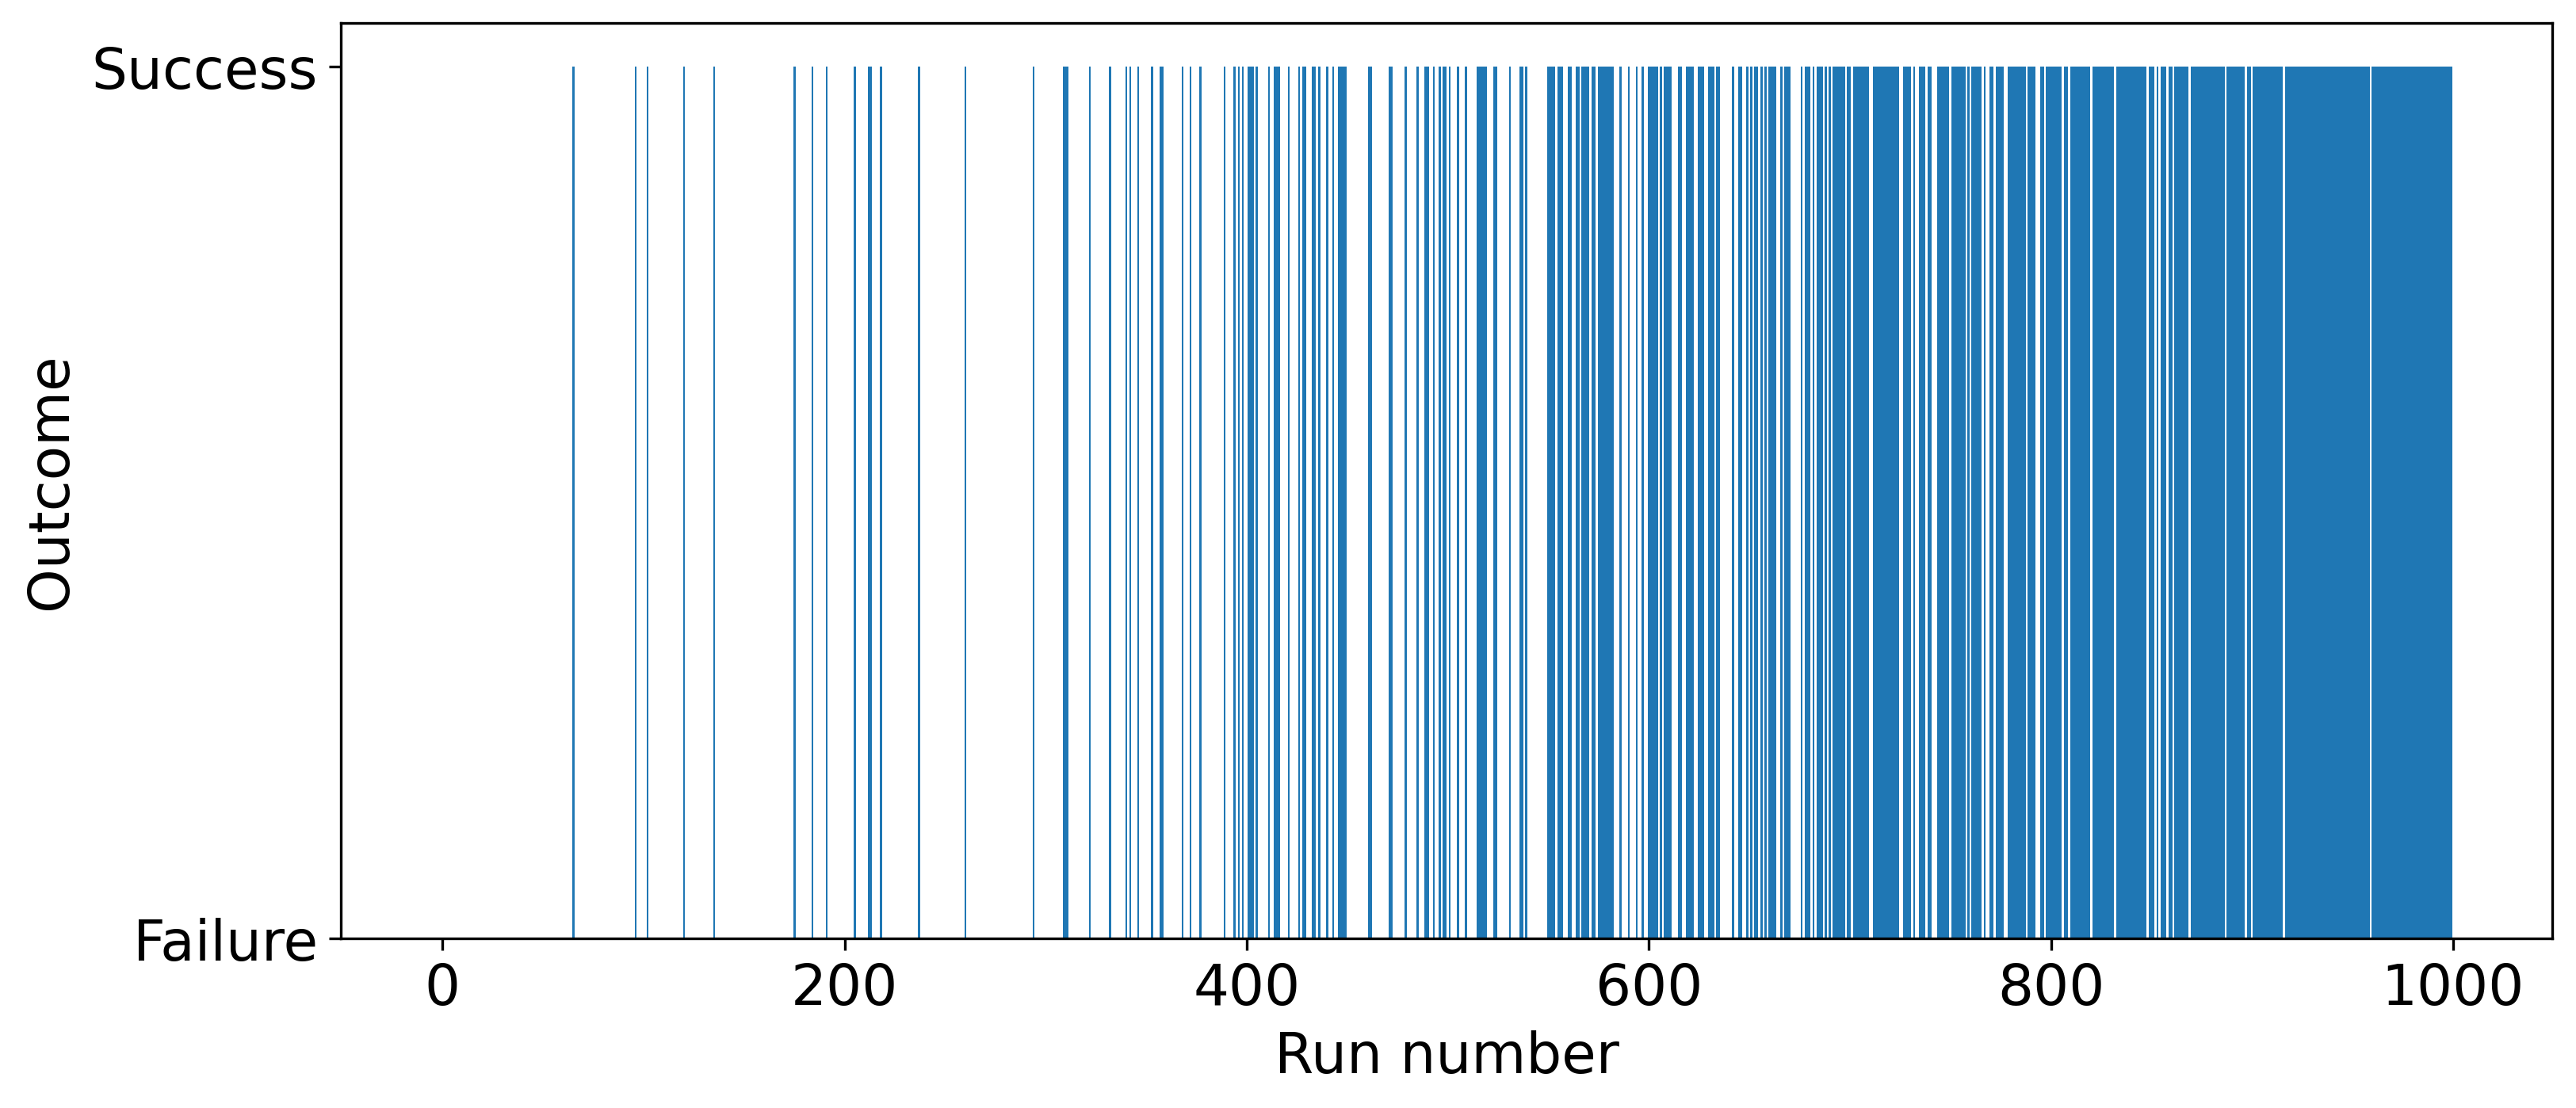

In [17]:
# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000       # Total number of episodes
alpha = 0.5         # Learning rate
gamma = 0.9         # Discount factor
epsilon = 1.0        # Amount of randomness in the action selection
epsilon_decay = 0.001    # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
  state = environment.reset()
  done = False

  # By default, we consider our outcome to be a failure
  outcomes.append('Failure')

  # Until the agent gets stuck in a hole or reaches the goal, keep training it
  while not done:
    # Generate a random number between 0 and 1
    rnd = np.random.random()

    # If random number < epsilon, take a random action
    if rnd < epsilon:
      action = environment.action_space.sample()
    # Else, take the action with the highest value in the current state
    else:
      action = np.argmax(qtable[state])

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, info = environment.step(action)

    # Update Q(s,a)
    qtable[state, action] = qtable[state, action] + \
                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

    # Update our current state
    state = new_state

    # If we have a reward, it means that our outcome is a success
    if reward:
      outcomes[-1] = 'Success'

  # Update epsilon
  epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel('Run number')
plt.ylabel('Outcome')
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

In [18]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
  state = environment.reset()
  done = False

  # Until the agent gets stuck or reaches the goal, keep training it
  while not done:
    # Choose the action with the highest value in the current state
    action = np.argmax(qtable[state])

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, info = environment.step(action)

    # Update our current state
    state = new_state

    # When we get a reward, it means we solved the game
    nb_success += reward

# Let's check our success rate!
print (f'Success rate = {nb_success/episodes*100}%')

Success rate = 100.0%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.11608711 0.05924795 0.05780104 0.0362188 ]
 [0.01761387 0.02747035 0.01192062 0.05049661]
 [0.05551314 0.0363969  0.03693672 0.03570307]
 [0.00936711 0.01782444 0.0160183  0.03111051]
 [0.10279771 0.03673736 0.0573839  0.01728808]
 [0.         0.         0.         0.        ]
 [0.0144256  0.01709492 0.01554917 0.01841945]
 [0.         0.         0.         0.        ]
 [0.06445064 0.03479443 0.01216445 0.14493816]
 [0.10070861 0.34695321 0.07695557 0.0767073 ]
 [0.05155708 0.14704502 0.06014453 0.07340582]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.20159492 0.22048159 0.65469415 0.23479873]
 [0.37722995 0.91561573 0.40696037 0.4139373 ]
 [0.

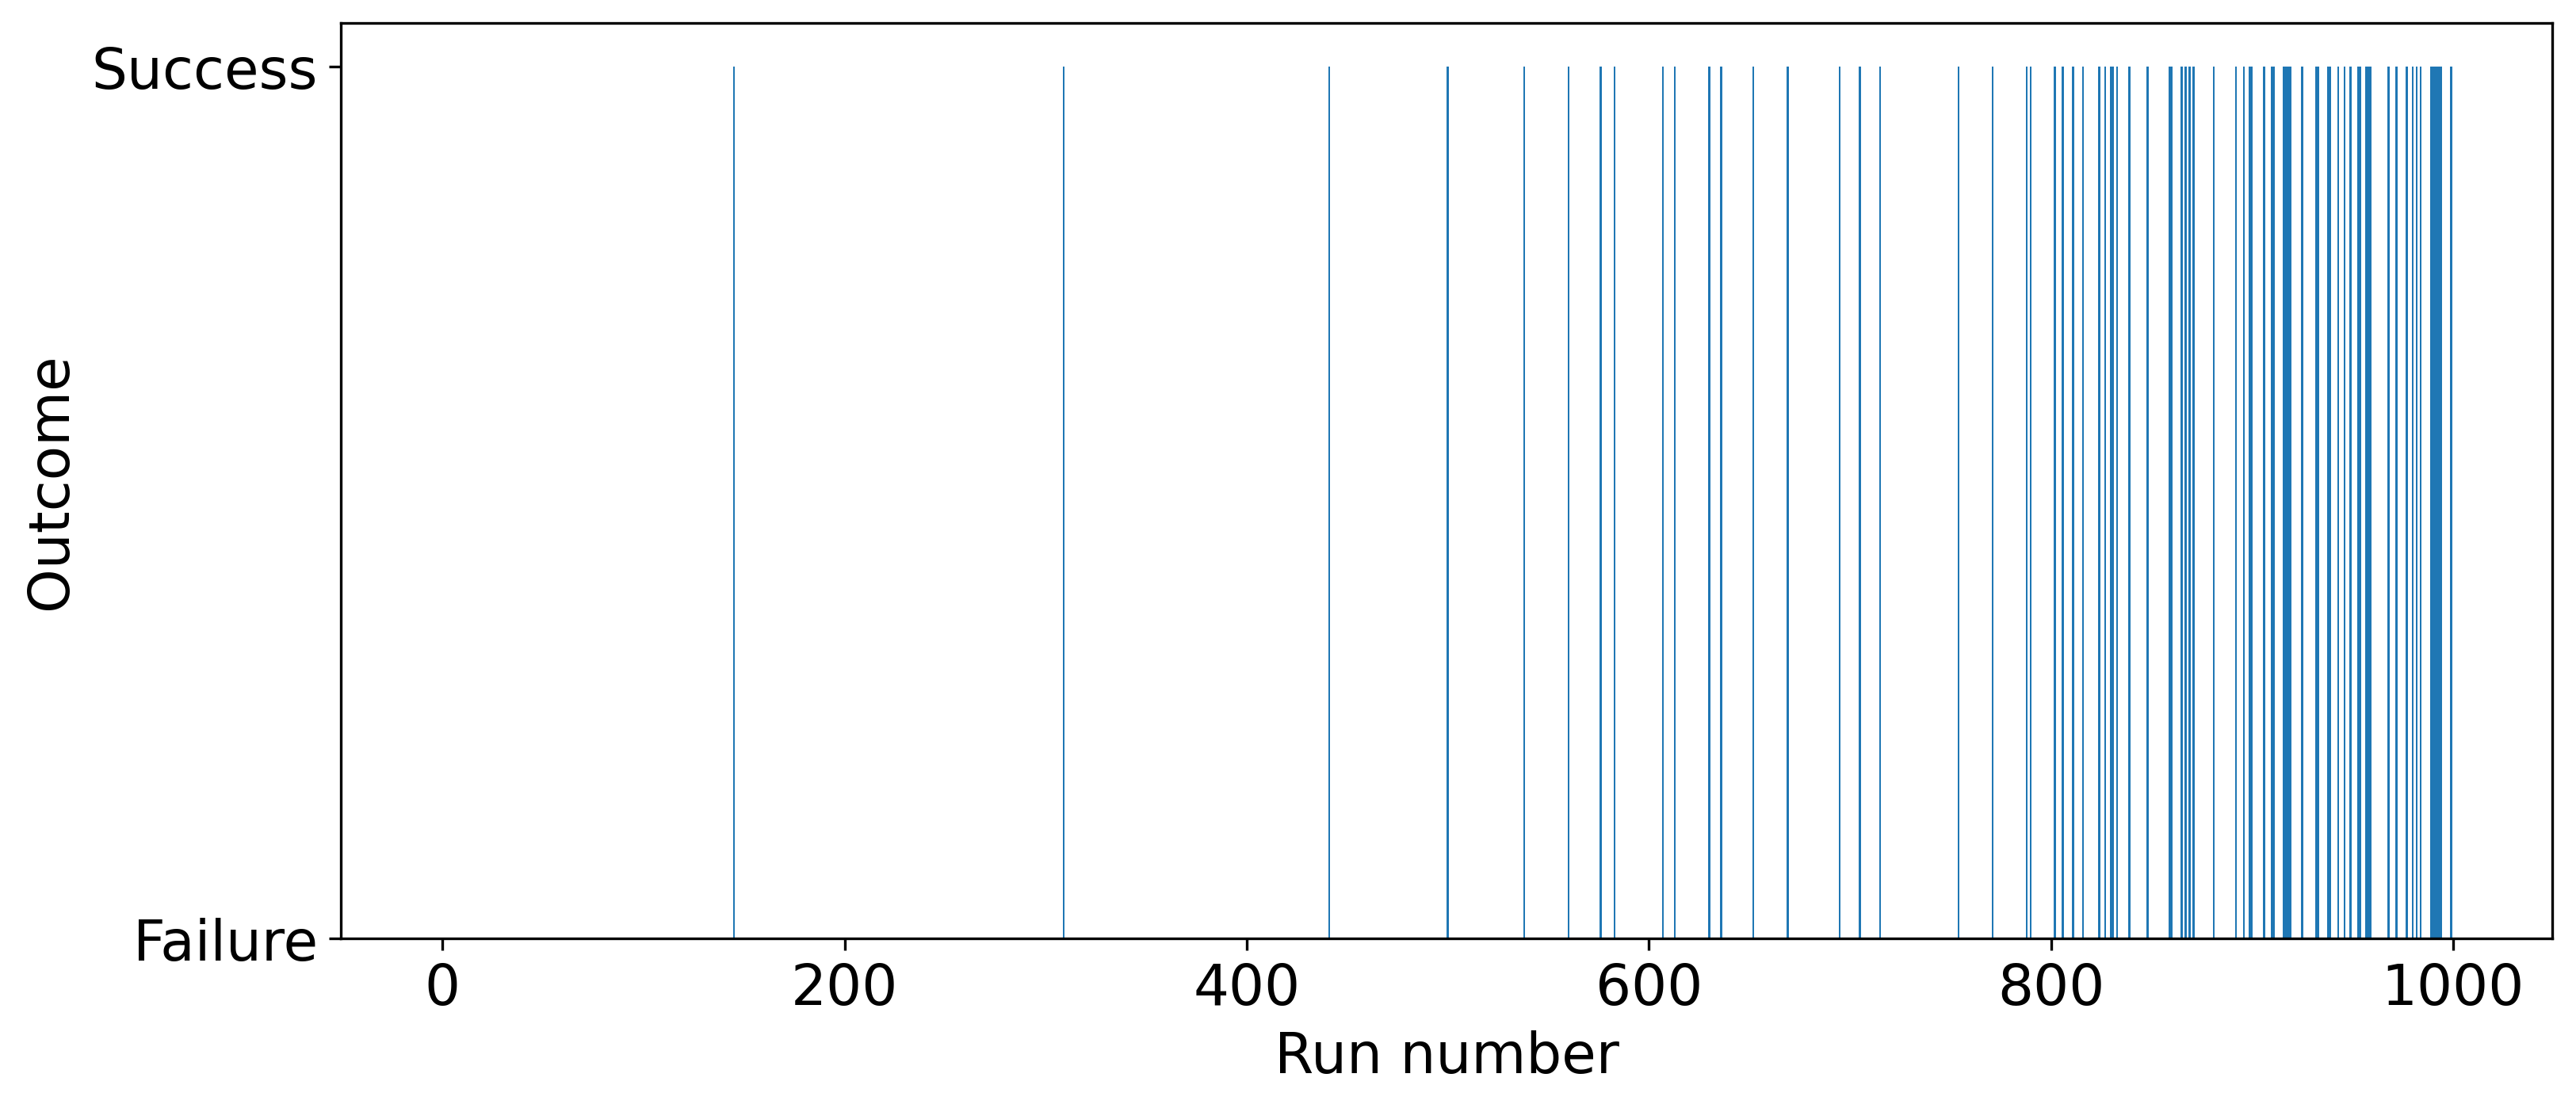

In [19]:
# Initialize the slippery Frozen Lake
environment = gym.make('FrozenLake-v1', is_slippery=True)
environment.reset()

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000         # Total number of episodes
alpha = 0.5           # Learning rate
gamma = 0.9           # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001      # Fixed amount to decrease

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

# Training
for _ in range(episodes):
  state = environment.reset()
  done = False

  # By default, we consider our outcome to be a failure
  outcomes.append('Failure')

  # Until the agent gets stuck in a hole or reaches the goal, keep training it
  while not done:
    # Generate a random number between 0 and 1
    rnd = np.random.random()

    # If random number < epsilon, take a random action
    if rnd < epsilon:
      action = environment.action_space.sample()
    # Else, take the action with the highest value in the current state
    else:
      action = np.argmax(qtable[state])

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, info = environment.step(action)

    # Update Q(s,a)
    qtable[state, action] = qtable[state, action] + \
                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

    # Update our current state
    state = new_state

    # If we have a reward, it means that our outcome is a success
    if reward:
      outcomes[-1] = 'Success'

  # Update epsilon
  epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel('Run number')
plt.ylabel('Outcome')
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

In [20]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
  state = environment.reset()
  done = False

  # Until the agent gets stuck or reaches the goal, keep training it
  while not done:
    # Choose the action with the highest value in the current state
    action = np.argmax(qtable[state])

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, info = environment.step(action)

    # Update our current state
    state = new_state

    # When we get a reward, it means we solved the game
    nb_success += reward

# Let's check our success rate!
print (f'Success rate = {nb_success/episodes*100}%')

Success rate = 53.0%
